In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

model_title = "Phi4-mini with fallback if unknown"

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_phi4mini_w_fallback_if_unknown.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_phi3": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_phi3", dropna=False)

entropy_ans_phi3
0      4459
3      1020
8      1002
7       915
4       867
1       858
6       832
2       741
5       527
9       417
10      343
To        8
409       4
84        2
310       2
-         2
240       2
258       1
53        1
103       1
840       1
108       1
811       1
804       1
126       1
144       1
676       1
650       1
638       1
614       1
190       1
540       1
508       1
270       1
504       1
192       1
454       1
45        1
43        1
20        1
203       1
216       1
324       1
320       1
220       1
302       1
280       1
380       1
Name: count, dtype: int64

In [3]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_phi3")
mmlu_entropy_df.value_counts("entropy_ans_phi3", dropna=False)

entropy_ans_phi3
3     1020
8     1002
7      915
4      867
1      858
6      832
2      741
5      527
9      417
10     343
20       1
Name: count, dtype: int64

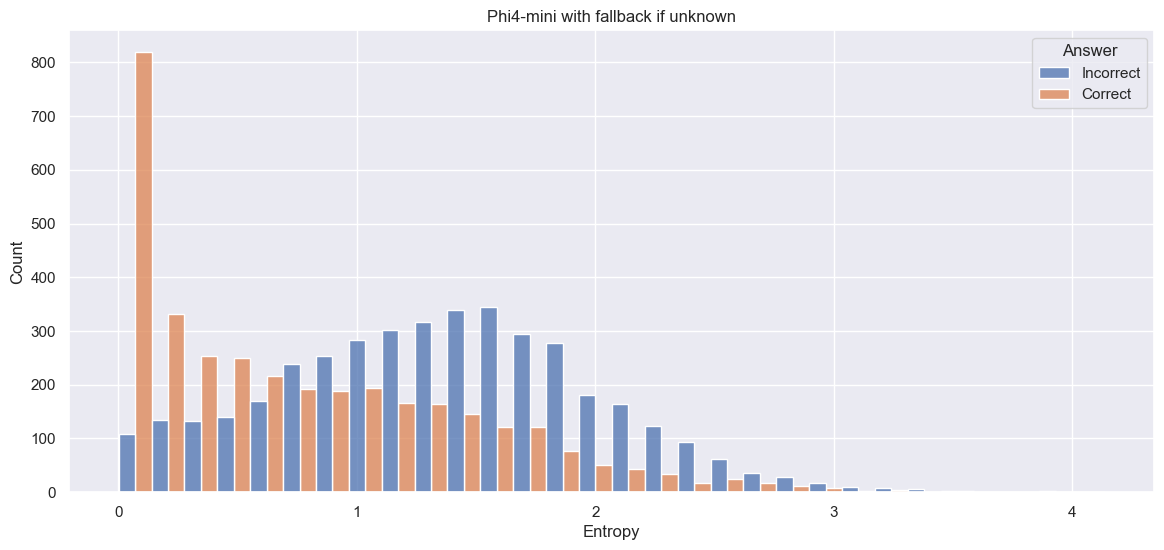

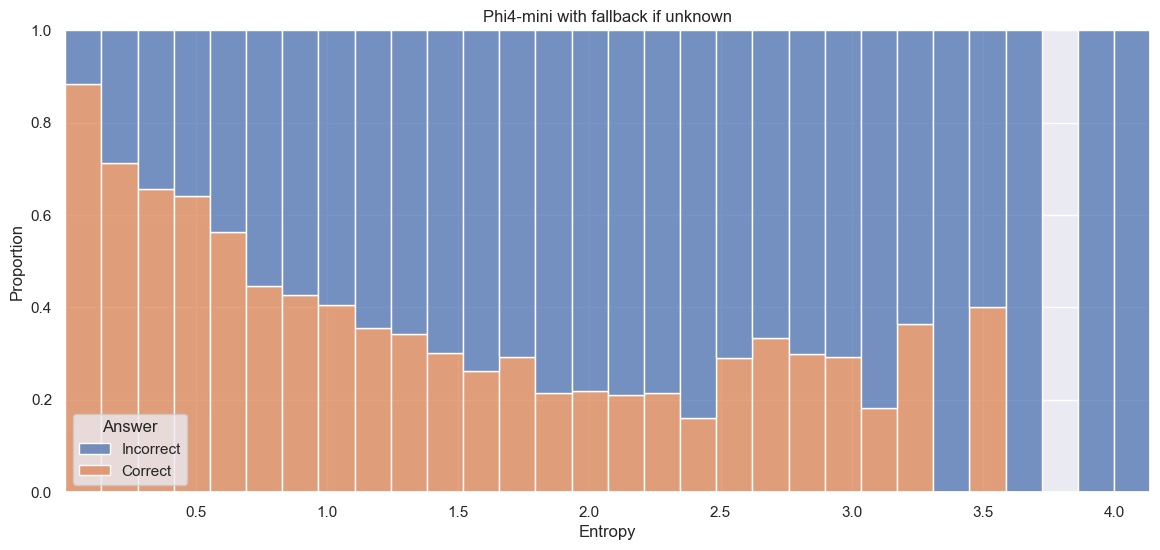

In [4]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_phi3", "entropy_ans_correct_phi3", model_name=model_title)

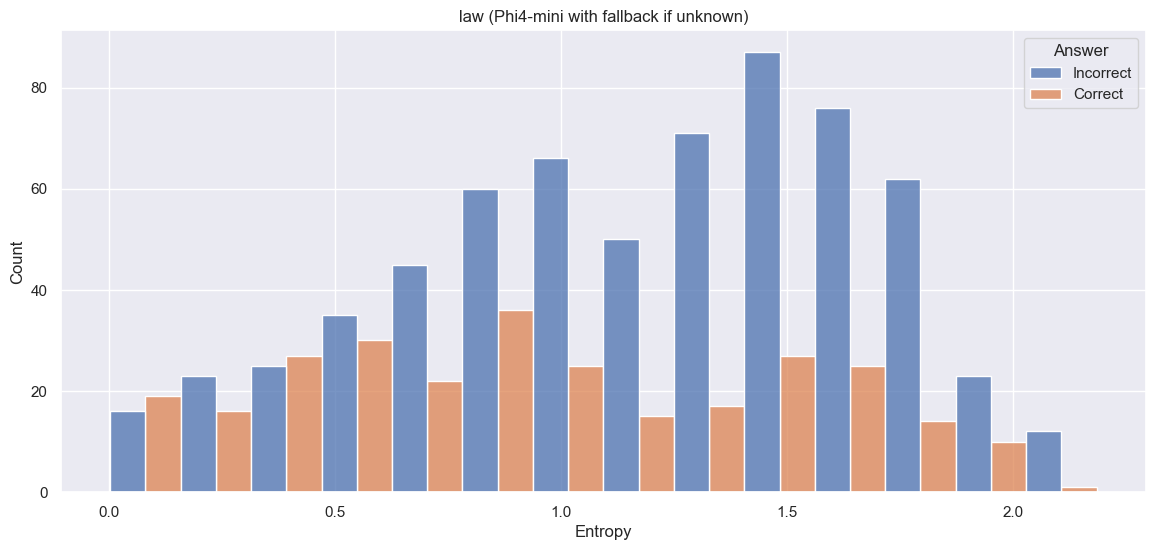

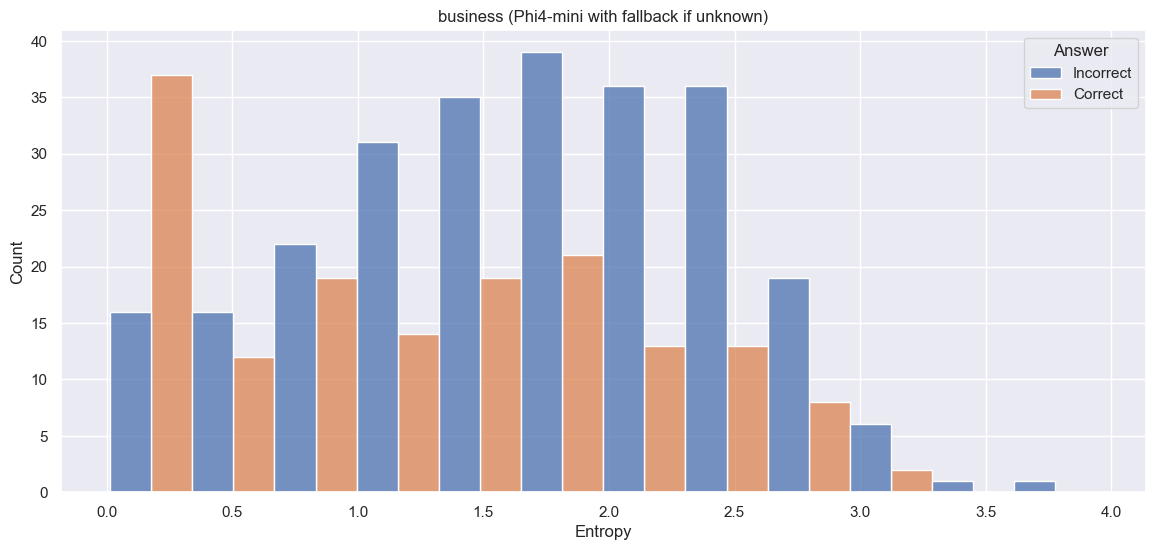

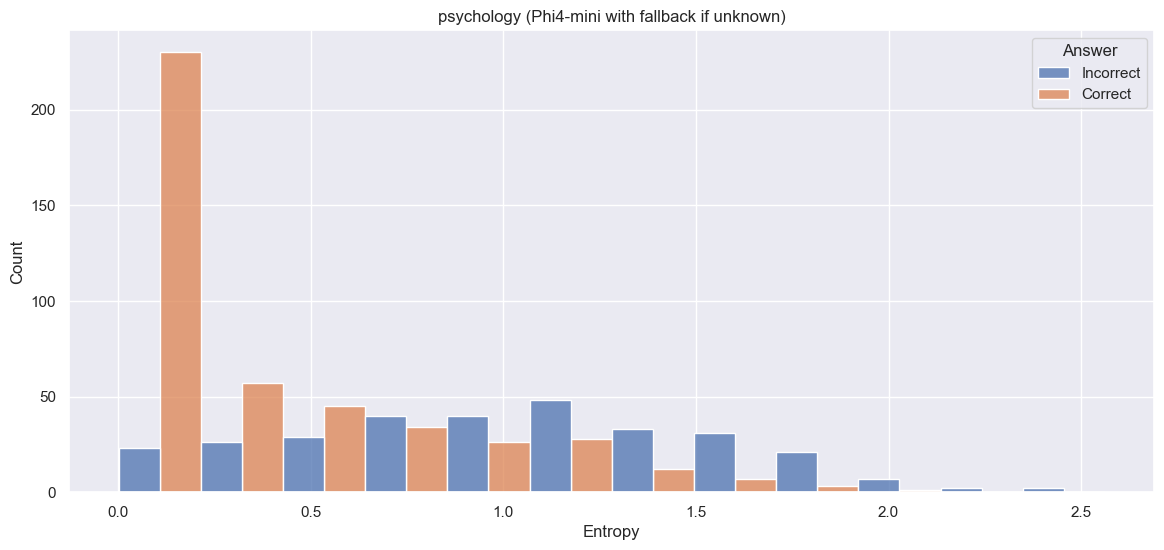

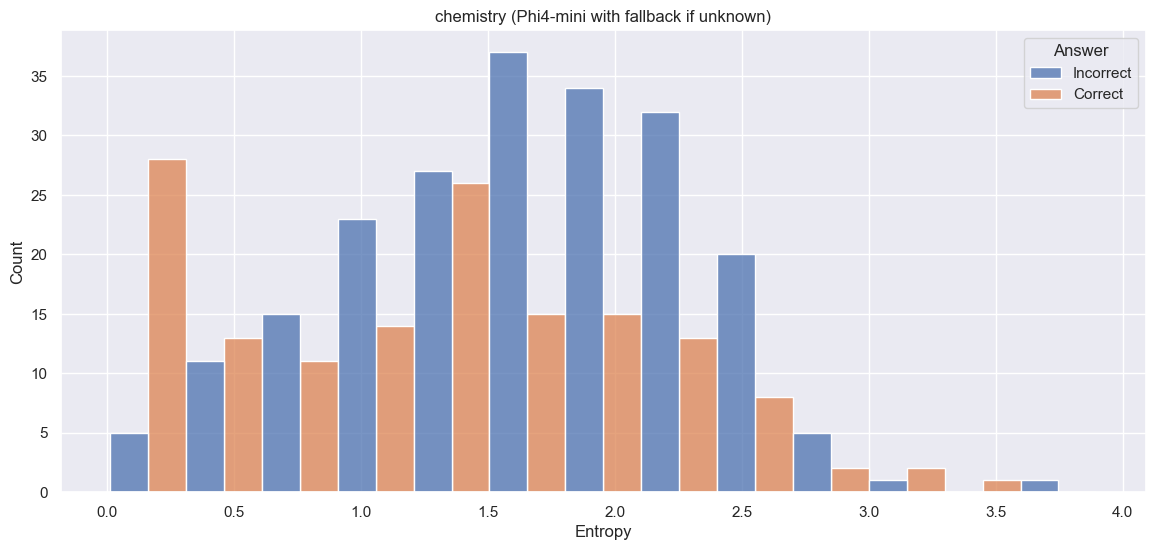

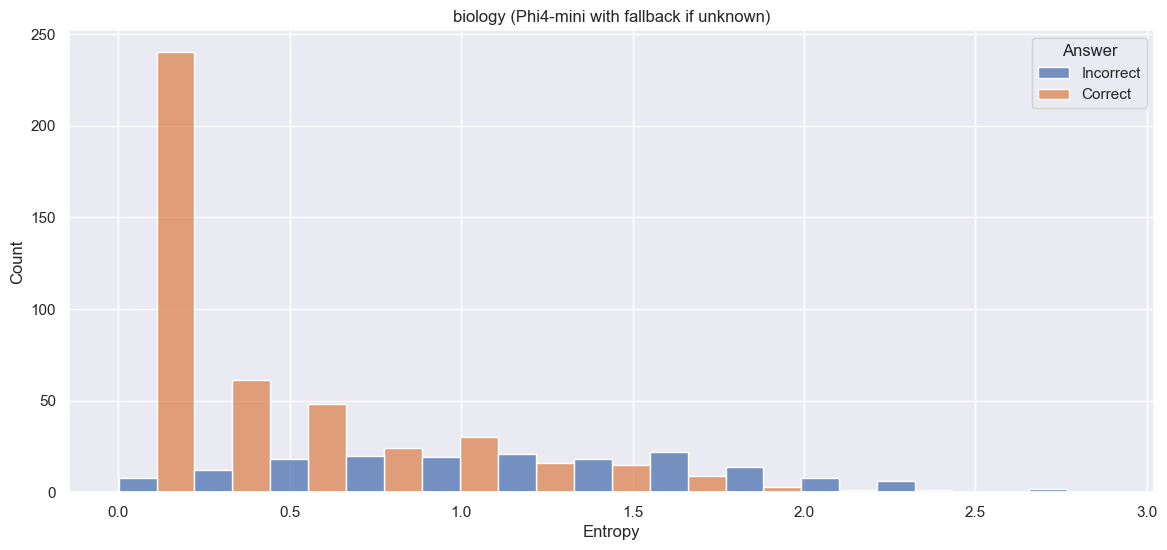

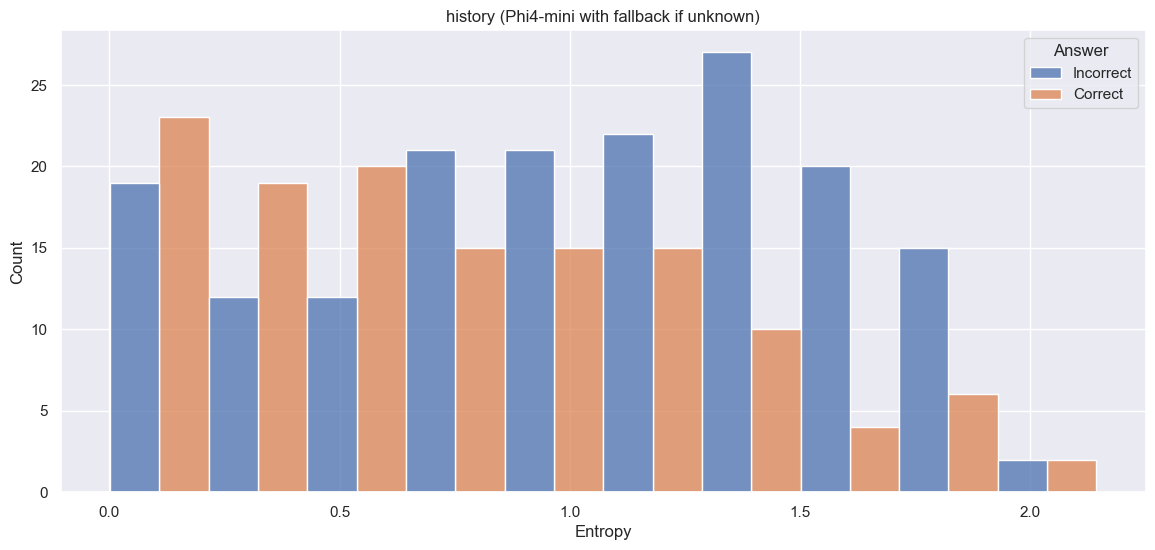

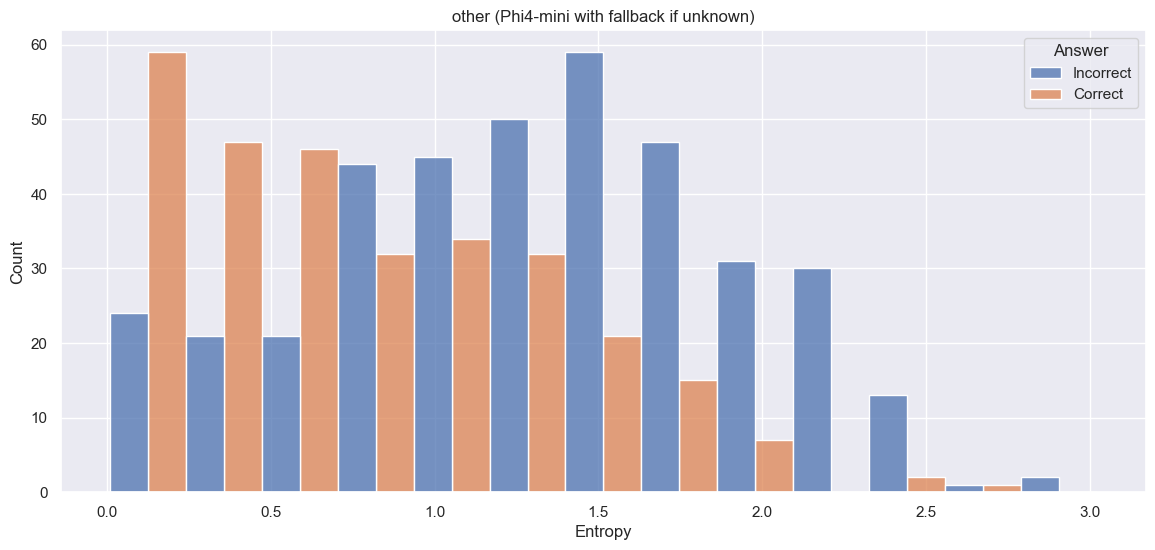

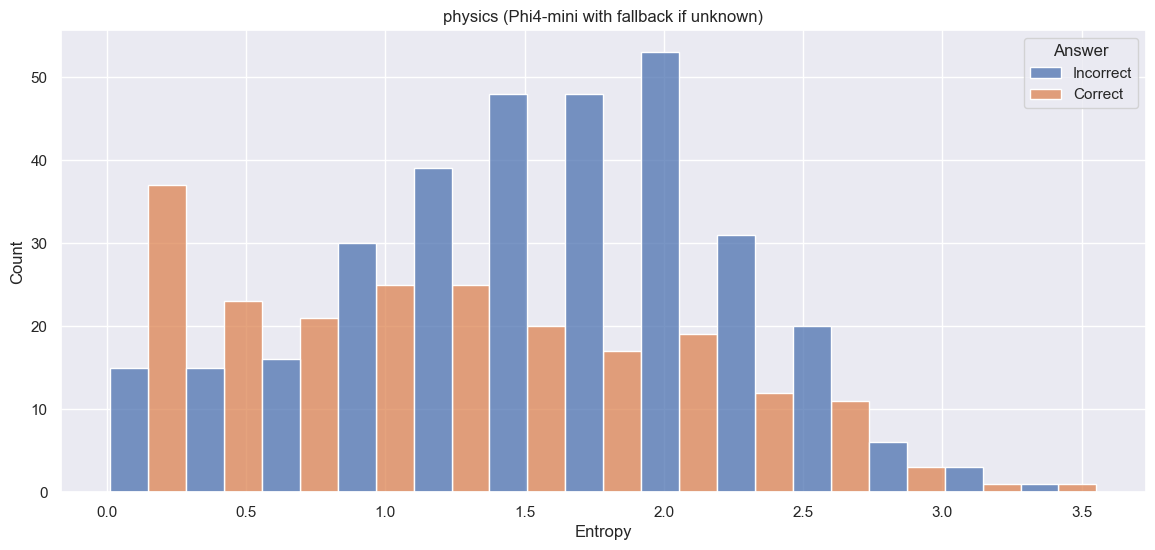

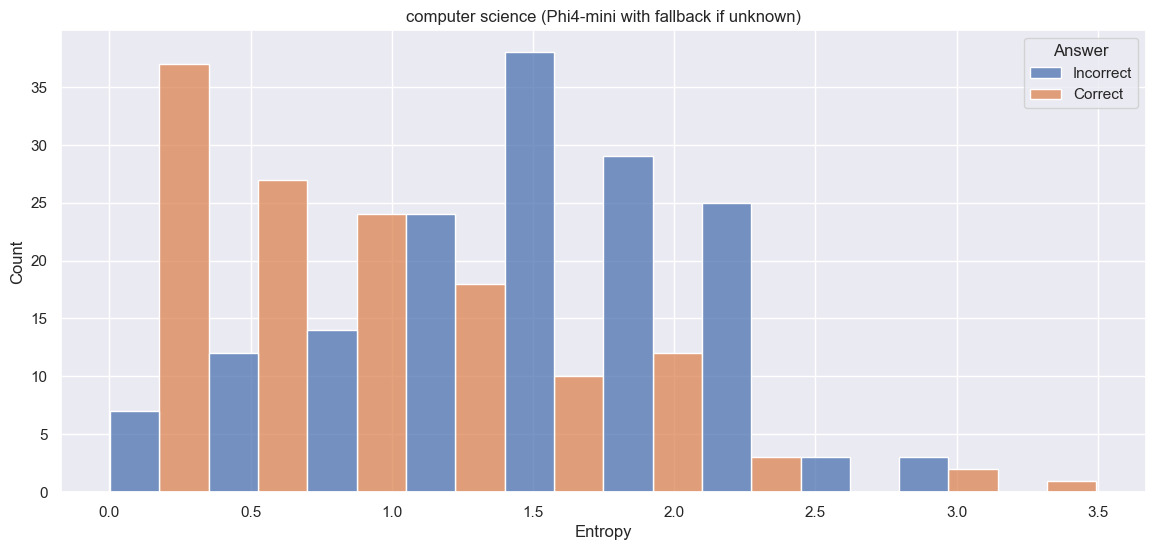

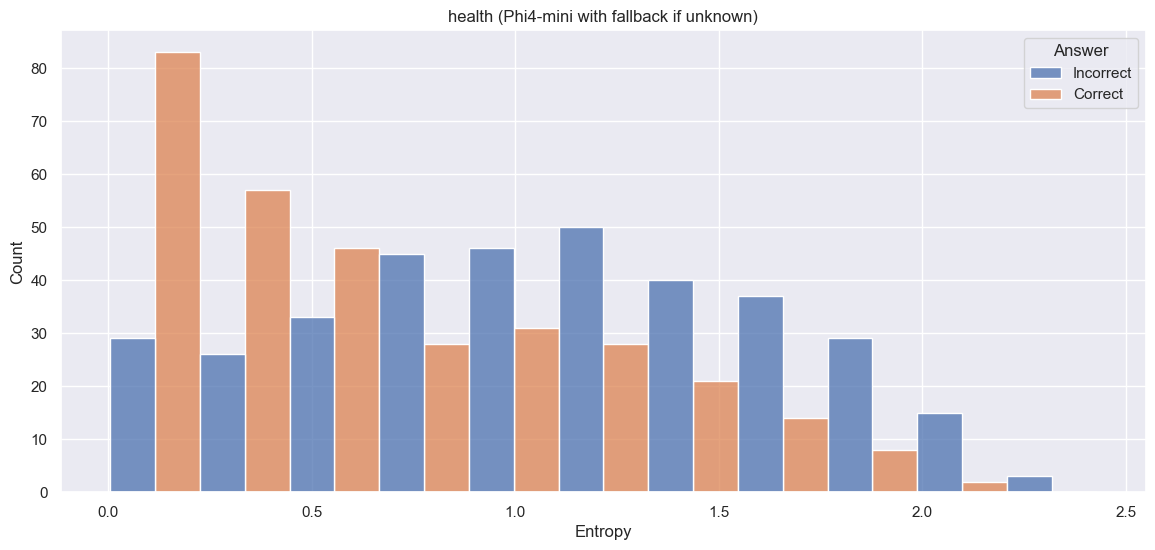

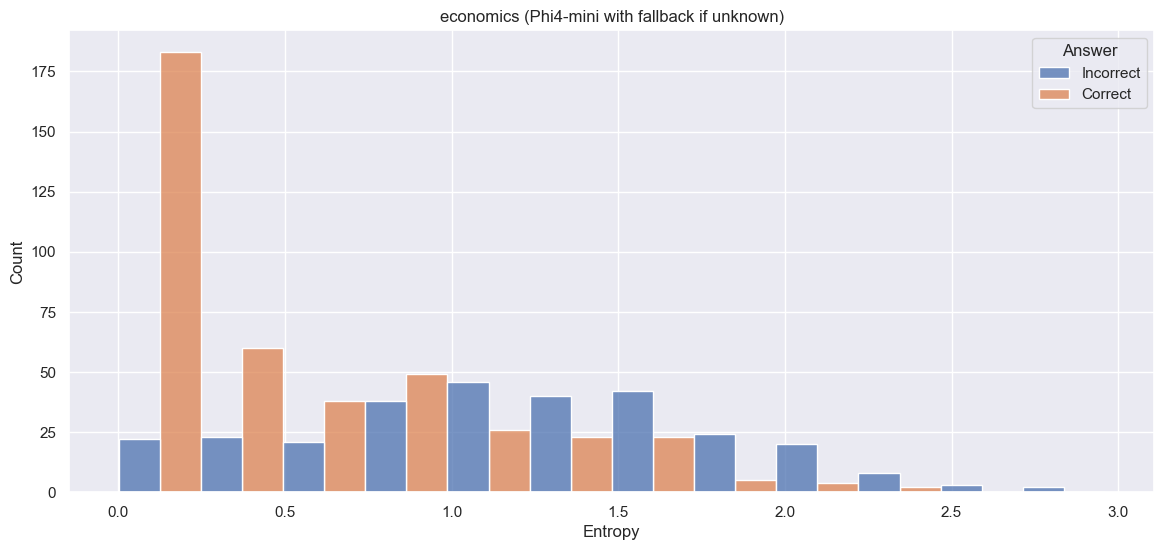

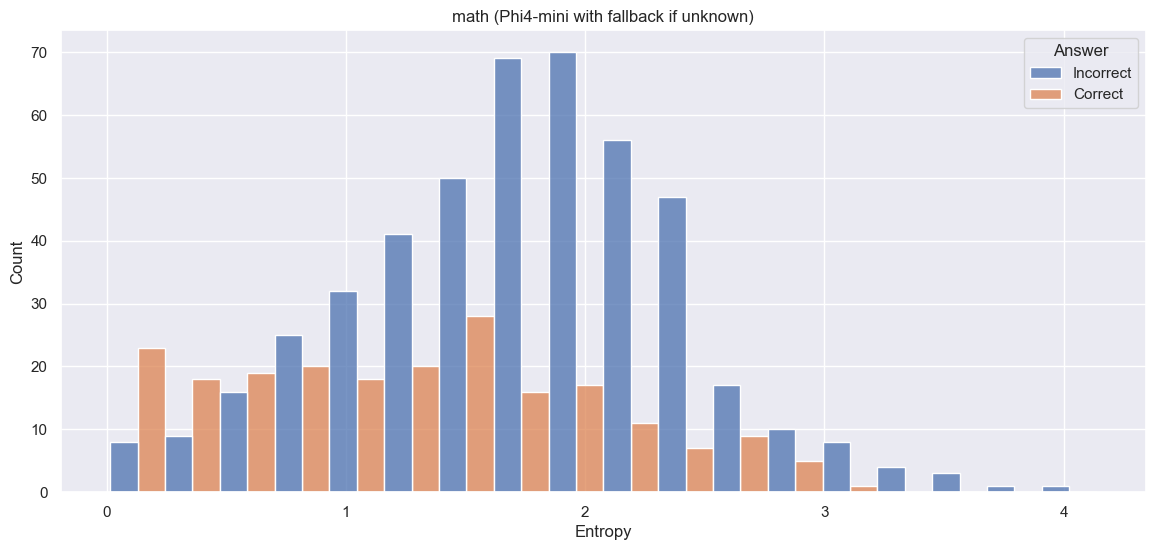

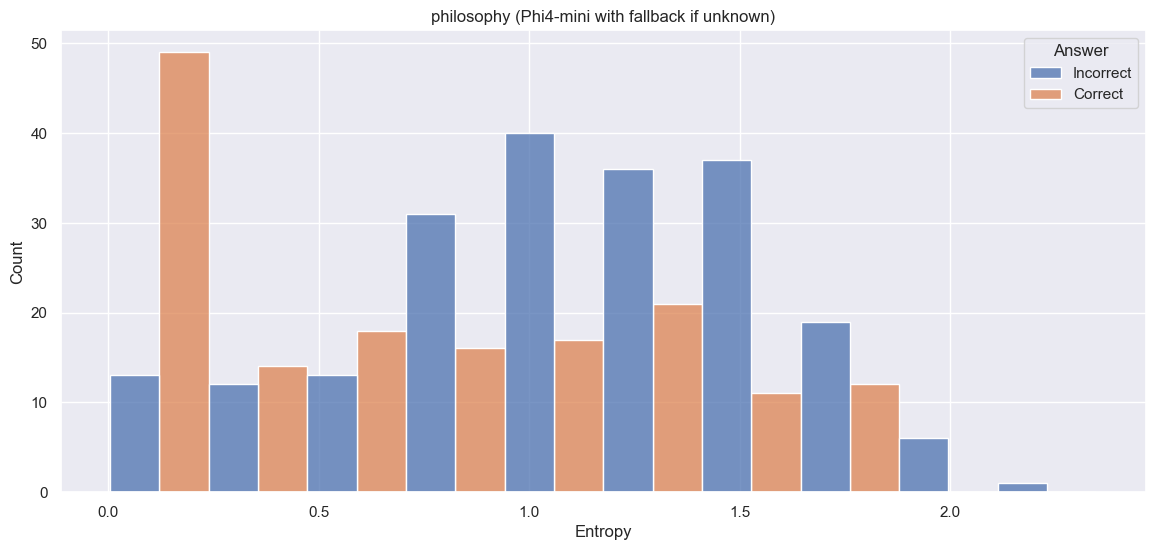

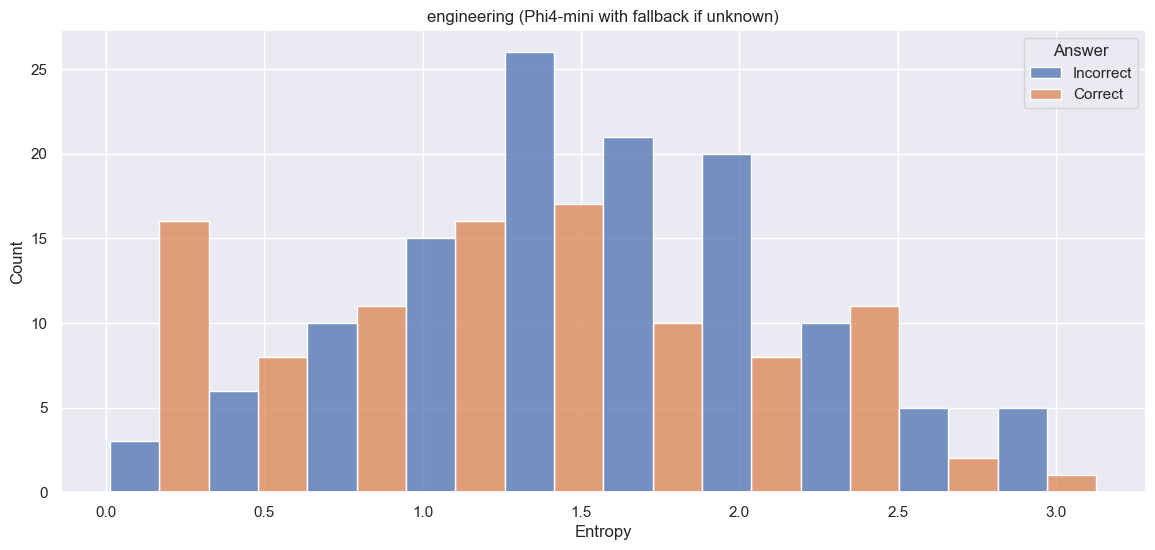

In [5]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df, "category", "entropy_value_phi3", "entropy_ans_correct_phi3", model_name=model_title
)

In [6]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df,
    category_col="category",
    model_answer_correct_col="entropy_ans_correct_phi3",
    score_col="entropy_value_phi3",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.740765,0.481530,7523,0.459391,Phi4-mini with fallback if unknown,entropy_value_phi3
1,law,0.623780,0.247561,935,0.303743,Phi4-mini with fallback if unknown,entropy_value_phi3
2,business,0.642945,0.285890,416,0.379808,Phi4-mini with fallback if unknown,entropy_value_phi3
3,psychology,0.820945,0.641891,745,0.594631,Phi4-mini with fallback if unknown,entropy_value_phi3
4,chemistry,0.643557,0.287114,359,0.412256,Phi4-mini with fallback if unknown,entropy_value_phi3
5,biology,0.853157,0.706314,616,0.727273,Phi4-mini with fallback if unknown,entropy_value_phi3
6,history,0.647445,0.294891,300,0.430000,Phi4-mini with fallback if unknown,entropy_value_phi3
7,other,0.737645,0.475289,684,0.432749,Phi4-mini with fallback if unknown,entropy_value_phi3
8,physics,0.658061,0.316122,540,0.398148,Phi4-mini with fallback if unknown,entropy_value_phi3
9,computer science,0.764035,0.528069,289,0.463668,Phi4-mini with fallback if unknown,entropy_value_phi3


In [7]:
from reasoning_fine_tune.analysis.join_with_masj_education_levels import join_with_masj_education_levels

mmlu_entropy_df_with_masj = join_with_masj_education_levels(mmlu_entropy_df)

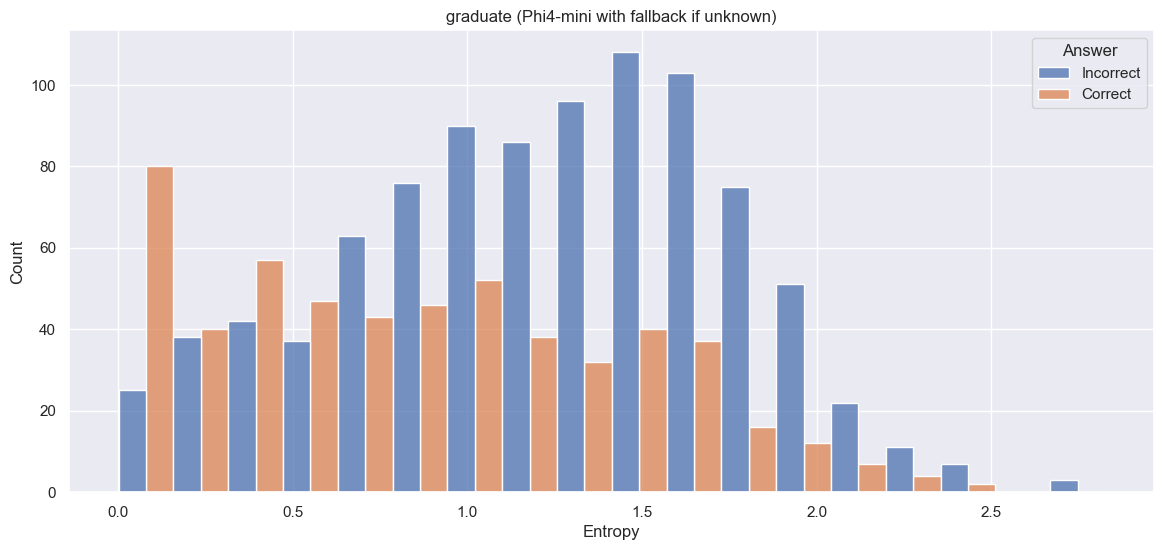

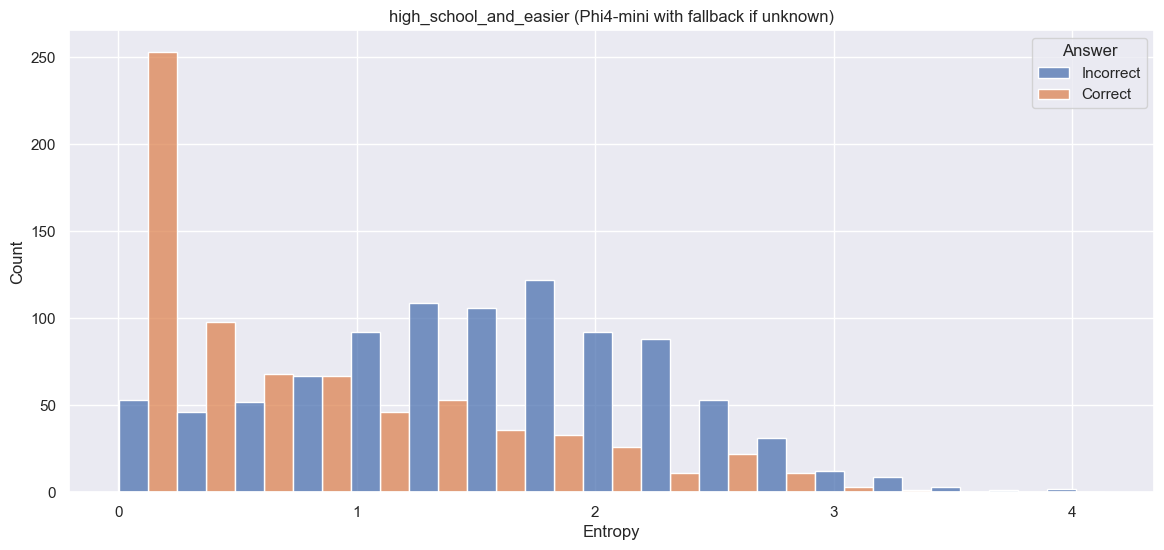

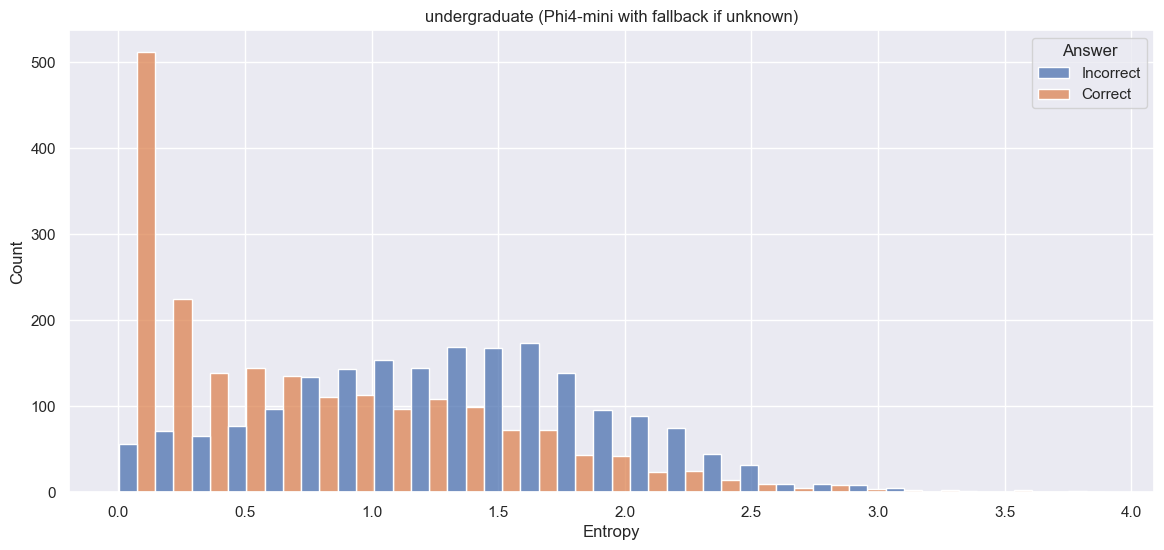

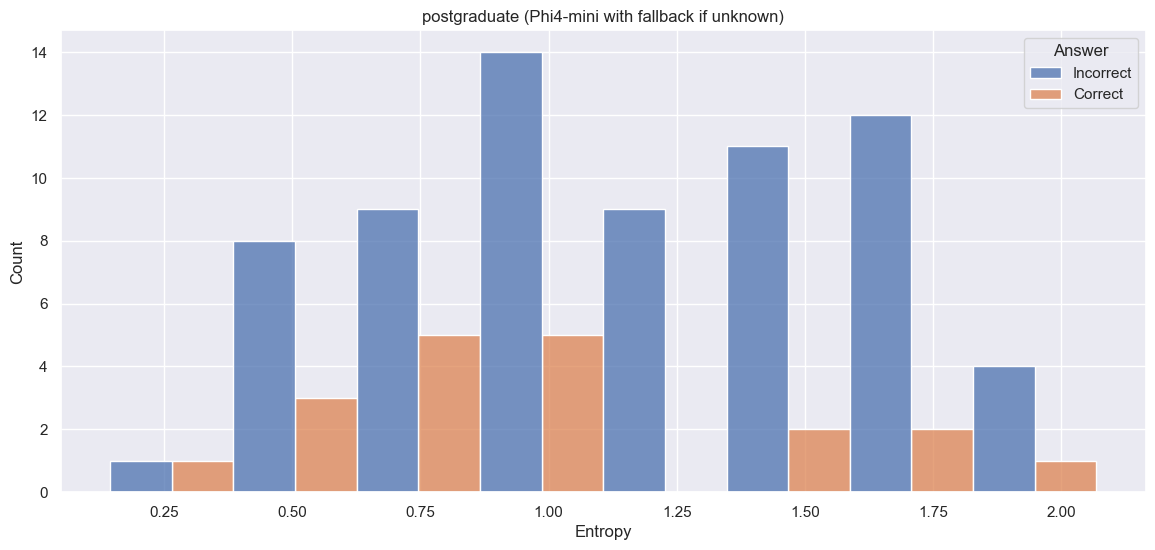

In [8]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df_with_masj,
    "masj_complexity",
    "entropy_value_phi3",
    "entropy_ans_correct_phi3",
    model_name=model_title,
)

In [9]:
from reasoning_fine_tune.analysis.roc_auc import calculate_roc_auc_by_category

roc_auc_res = calculate_roc_auc_by_category(
    mmlu_entropy_df_with_masj,
    category_col="masj_complexity",
    model_answer_correct_col="entropy_ans_correct_phi3",
    score_col="entropy_value_phi3",
    model_name=model_title,
)
roc_auc_res

,category,roc_auc,gini,num_samples,accuracy,model,metric
0,ALL,0.740882,0.481765,7209,0.458871,Phi4-mini with fallback if unknown,entropy_value_phi3
1,graduate,0.678714,0.357429,1486,0.372140,Phi4-mini with fallback if unknown,entropy_value_phi3
2,high_school_and_easier,0.769739,0.539478,1666,0.436975,Phi4-mini with fallback if unknown,entropy_value_phi3
3,undergraduate,0.746531,0.493063,3970,0.505793,Phi4-mini with fallback if unknown,entropy_value_phi3
4,postgraduate,0.627709,0.255418,87,0.218391,Phi4-mini with fallback if unknown,entropy_value_phi3
